In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [3]:
df=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("house-prices-advanced-regression-techniques/test.csv",index_col='Id')

# **Exploring Data**

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pd.set_option('display.max_columns', None)
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [7]:
df.shape

(1460, 81)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [26]:
df_isnull_sum = df.isnull().sum()

In [29]:
len(df_isnull_sum[df_isnull_sum > 0])

19

## **+missing value**

### 삭제할 컬럼 (결측치 유추 불가 & 결측치 다수)
- LotFrontage

### Null값 row을 삭제할 컬럼 (결측치 유추 불가, 결측치 소수)
- MasVnrArea
- Electrical

### fillna로 채울 컬럼 (결측치 유추 가능)
- Alley -> 'None'
- MasVnrType -> 'None'
- BsmtQual -> 'None'
- BsmtCond -> 'None'
- BsmtExposure -> 'None'
- BsmtFinType1 -> 'None'
- BsmtFinType2 -> 'None'
- FireplaceQu ->  'None'
- GarageType -> 'None'
- GarageYrBlt -> 'None'
- GarageFinish -> 'None'
- GarageQual -> 'None'
- GarageCond -> 'None'
- PoolQC -> 'None'
- Fence -> 'None'
- MiscFeature -> 'None'

In [31]:
# 삭제할 컬럼
df1 = df.copy()
df1 = df1.drop('LotFrontage',axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
# Null 값 row를 삭제할 컬럼
df2 = df1.copy()
df2 = df2.drop(index = df2[df2.MasVnrArea.isnull()].index)
df2 = df2.drop(index = df2[df2.Electrical.isnull()].index)

In [73]:
# fillna로 채울 컬럼
df3 = df2.copy()
num_col = df3.select_dtypes(include=np.number).columns
cat_col = df3.select_dtypes(exclude=np.number).columns

df3[num_col] = df3[num_col].fillna(0)
df3[cat_col] = df3[cat_col].fillna('None')
# df3 = df3.fillna('None')

In [76]:
# 결측치 없음
df3.isnull().sum().sum()

0

In [81]:
# 인덱스 초기화
df3 = df3.reset_index(drop=True)

In [372]:
ptr_df=df3.copy()
# ptr_df.head()

In [271]:
# column_are_not_helpful_in_prediction=ptr_df[['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtFinSF2','Heating','CentralAir','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional','PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition','BldgType']]
# column_are_not_helpful_in_prediction
# ptr_df.drop(column_are_not_helpful_in_prediction, axis=1, inplace=True)

,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,RoofMatl,ExterCond,BsmtFinSF2,Heating,...,Functional,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,BldgType
0,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,...,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
1,Pave,Lvl,AllPub,Gtl,Feedr,Norm,CompShg,TA,0,GasA,...,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
2,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,...,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
3,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,...,Typ,Y,272,0,0,0,0,WD,Abnorml,1Fam
4,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,...,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,...,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
1447,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,163,GasA,...,Min1,Y,0,0,0,0,0,WD,Normal,1Fam
1448,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,Gd,0,GasA,...,Typ,Y,0,0,0,0,2500,WD,Normal,1Fam
1449,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,1029,GasA,...,Typ,Y,112,0,0,0,0,WD,Normal,1Fam


In [373]:
def remove_outliers(df, columns, threshold=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_remove_outliers = ['MSSubClass','OverallQual','OverallCond','BsmtFinSF1','2ndFlrSF','BsmtFullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']


removed_outlier = remove_outliers(ptr_df, columns_to_remove_outliers)

In [374]:
def factorize_categorical_columns(column):
    if column.dtype == 'object':
        column_encoded, _ = pd.factorize(column)
        return column_encoded
    return column

# Apply factorize only to categorical columns
df_encoded = removed_outlier.apply(factorize_categorical_columns)

# 'df_encoded' now contains the encoded values for categorical columns


In [375]:
final_df = df_encoded.copy()

### 높은 상관관계를 가진 변수를 선택하는게 아닌, 특정 값보다 높은 상관관계를 가진 변수를 제거

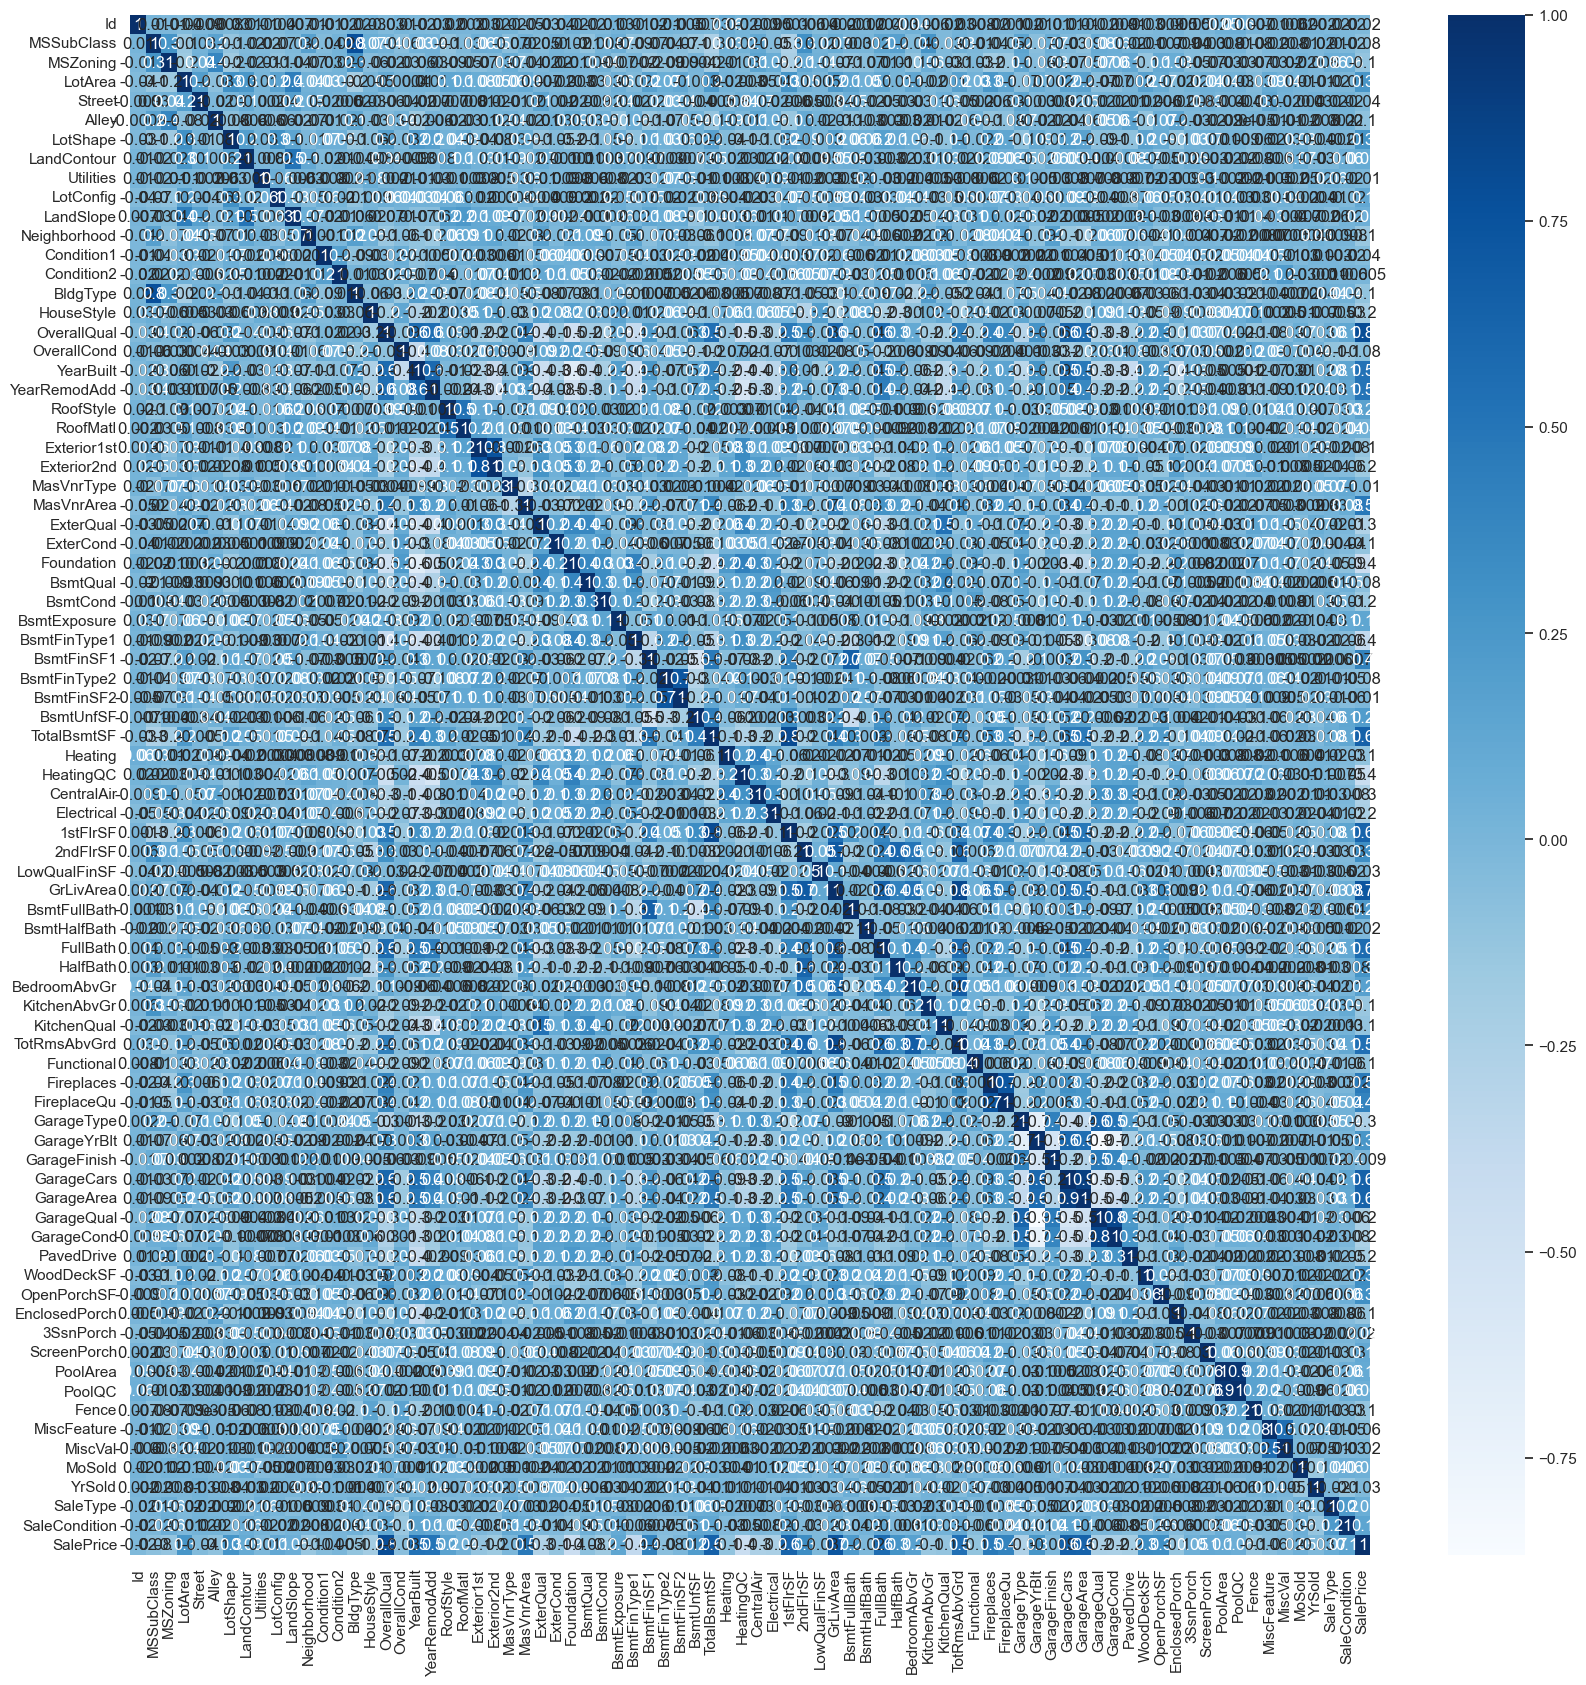

In [309]:
cor=final_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

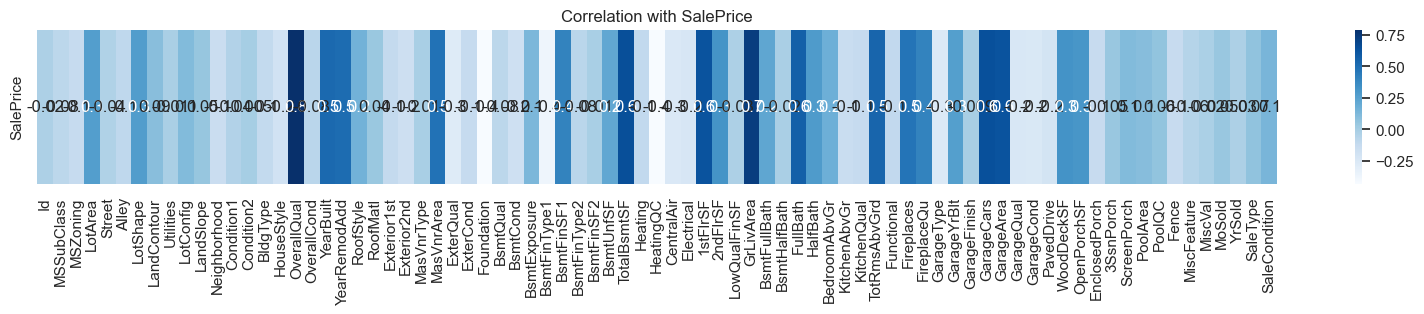

In [310]:
# Extract the correlation of 'SalePrice' with other factors
correlation_with_saleprice = cor['SalePrice']

# Create a heatmap of the correlation
plt.figure(figsize=(20, 2))
sns.heatmap(data=correlation_with_saleprice[:-1].to_frame().T, annot=True, cmap='Blues', fmt='.1g')
plt.title('Correlation with SalePrice')
plt.show()

In [344]:
# best_col = list(correlation_with_saleprice[correlation_with_saleprice>0.1].index)

In [277]:
# Find highly correlated features
highly_correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.85:  
            colname_i = cor.columns[i]
            colname_j = cor.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Convert the set of highly correlated features to a list
highly_correlated_features_list = list(highly_correlated_features)

# Print or inspect the highly correlated features
print(highly_correlated_features_list)


['GarageCars', 'GarageArea']


In [377]:
# sel_df = final_df.drop(columns = ['GarageCars','GrLivArea','TotalBsmtSF','GarageArea','1stFlrSF','TotRmsAbvGrd'], axis=1)
# sel_df = final_df.drop(columns = highly_correlated_features_list, axis=1)
# sel_df = final_df[best_col]
sel_df = final_df.copy()

In [397]:
X=sel_df.drop(['Id','SalePrice'],axis=1)
X.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,8450,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2008,0,0
2,60,0,11250,0,0,1,0,0,0,0,...,0,0,0,0,0,0,9,2008,0,0
3,70,0,9550,0,0,1,0,0,1,0,...,0,0,0,0,0,0,2,2006,0,1
5,50,0,14115,0,0,1,0,0,0,0,...,0,0,0,1,1,700,10,2009,0,0
6,20,0,10084,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,2007,0,0


### z-normalization

In [431]:
# training dataset에 normalize하는 함수 생성(validation/ test에 사용할 cache 저장)
def z_normalize(df_, columns):
    if sum(df_.loc[:, columns].std() == 0) != 0: # 표준편차가 0인 (즉, 분산이 0인) 열이 존재한다면
        print('하나의 값만 존재하는 컬럼이 있음') # 다음과 같은 내용을 출력한다.
        return
    cache = {}
    cache['mean'] = df_.loc[:, columns].mean(axis = 0)
    cache['std'] = df_.loc[:, columns].std(axis = 0)

    return (df_.loc[:, columns] - df_.loc[:, columns].mean(axis=0)) / df_.loc[:, columns].std(axis = 0), cache

# 2. validation set과 test set을 normalize하는 함수 생성 및 적용
def z_normalize_val(df_, columns, cache):
    return (df_.loc[:, columns] - cache['mean']) / cache['std']

In [441]:
X_norm = X.copy()
X_norm.loc[:,X_norm.columns], cache = z_normalize(X_norm, X_norm.columns)
X = X_norm.copy()

In [399]:
y=sel_df['SalePrice']

In [400]:
y.shape

(1007,)

In [401]:
import statsmodels.api as sm
x=sm.add_constant(X)
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1065.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:55:35   Log-Likelihood:                         -11414.
No. Observations:                1007   AIC:                                  2.298e+04
Df Residuals:                     931   BIC:                                  2.335e+04
Df Model:                          76                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -100.0203     58.899     -1.698      0.090    -215.611      15.571
MSZoning       2323.1093   1105.732      2.101      0.036     153.093    4493.126
LotArea           0.4787      0.088      5.420      0.000       0.305       0.652
Street        -1.587e+04   1.16e+04     -1.370      0.171   -3.86e+04    6867.106
Alley          -717.2080   2473.482     -0.290      0.772   -5571.454    4137.038
LotShape        648.6073   1356.996      0.478      0.633   -2014.517    3311.732
LandContour    2350.3076   1455.760      1.614      0.107    -506.645    5207.260
Utilities     -3.379e+04   2.27e+04     -1.490      0.137   -7.83e+04    1.07e+04
LotConfig      1181.6172    905.500      1.305      0.192    -595.440    2958.674
LandSlope      -496.6682   3873.526     -0.128      0.898   -8098.522    7105.186
Neighborhood    461.5487    135.196      3.414      0.001     196.224     726.873
Condition1    -1505.6310    479.189     -3.142      0.002   -2446.046    -565.216
Condition2    -3481.7462   9814.422     -0.355      0.723   -2.27e+04    1.58e+04
BldgType       -275.1003   3048.304     -0.090      0.928   -6257.444    5707.244
HouseStyle     -765.2864    977.291     -0.783      0.434   -2683.234    1152.661
OverallQual    1.233e+04   1003.755     12.280      0.000    1.04e+04    1.43e+04
OverallCond    6932.4123   1119.263      6.194      0.000    4735.842    9128.983
YearBuilt       446.4014     61.364      7.275      0.000     325.974     566.829
YearRemodAdd    166.8981     56.318      2.964      0.003      56.374     277.423
RoofStyle     -1602.0966   1457.890     -1.099      0.272   -4463.228    1259.035
RoofMatl        800.6575   2586.597      0.310      0.757   -4275.578    5876.893
Exterior1st    -444.6902    392.517     -1.133      0.258   -1215.011     325.630
Exterior2nd    1216.8268    423.298      2.875      0.004     386.098    2047.555
MasVnrType     2438.1606   1142.742      2.134      0.033     195.511    4680.810
MasVnrArea       18.3882      5.098      3.607      0.000       8.384      28.393
ExterQual      1186.9911   1782.881      0.666      0.506   -2311.940    4685.922
ExterCond     -2580.2422   1306.803     -1.974      0.049   -5144.864     -15.621
Foundation    -1706.1434    728.760     -2.341      0.019   -3136.346    -275.941
BsmtQual       7086.4902   1138.422      6.225      0.000    4852.319    9320.662
BsmtCond       -793.5524   1445.986     -0.549      0.583   -3631.322    2044.217
BsmtExposure   3060.5858    701.280      4.364      0.000    1684.312    4436.859
BsmtFinType1  -1397.5314    549.173     -2.545      0.011   -2475.292    -319.771
BsmtFinSF1       16.6743      2.621      6.362      0.000      11.531      21.818
BsmtFinType2    -41.0931   1011.

In [402]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(X,y)

LinearRegression()

In [403]:
r2=reg.score(X,y)
r2

0.8968911520521112

In [404]:
X.shape

(1007, 78)

In [405]:
r2=reg.score(X, y)
n=X.shape[0]
p=X.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.8882246756082154

# **Dealing with test data**

In [406]:
# 삭제할 컬럼
df_test1 = df_test.copy()
df_test1 = df_test1.drop('LotFrontage',axis=1)

In [407]:
# Null 값 row를 삭제할 컬럼
df_test2 = df_test1.copy()
df_test2 = df_test2.drop(index = df2[df2.MasVnrArea.isnull()].index)
df_test2 = df_test2.drop(index = df2[df2.Electrical.isnull()].index)

In [408]:
# fillna로 채울 컬럼
df_test3 = df_test2.copy()
num_col = df_test3.select_dtypes(include=np.number).columns
cat_col = df_test3.select_dtypes(exclude=np.number).columns

df_test3[num_col] = df_test3[num_col].fillna(0)
df_test3[cat_col] = df_test3[cat_col].fillna('None')
# df3 = df3.fillna('None')

In [409]:
# 결측치 없음
df3.isnull().sum().sum()

0

In [410]:
# 인덱스 초기화
df_test3 = df_test3.reset_index(drop=True)

In [411]:
df_test_sel=df_test3[X.columns]

In [412]:
df_test_sel.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 78, dtype: int64

In [413]:
def pre_process_test(df_test_sel):
    n_df_t=df_test_sel.select_dtypes(include='number')
    n_cols_t=n_df_t.columns
    for col in n_cols_t:
        df_test_sel.loc[:, col] = df_test_sel[col].fillna(df_test_sel[col].median())
    s_df_t=df_test_sel.select_dtypes(include='object')
    s_cols_t=s_df_t.columns
    for col in s_cols_t:
        df_test_sel.loc[:, col] = df_test_sel[col].fillna(df_test_sel[col].value_counts().idxmax())
    for col in s_cols_t:
        df_test_sel.loc[:,col]=pd.factorize(df_test_sel[col])[0]  
    return df_test_sel     

ptr_df_t=pre_process_test(df_test_sel)
ptr_df_t.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 78, dtype: int64

In [414]:
ptr_df_t.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [415]:
X_test=ptr_df_t[X.columns]

In [443]:
X_test.loc[:,X_test.columns] = z_normalize_val(X_test, X_test.columns, cache)

In [445]:
X_train=X
y_train=y

# **Applying ML Algorithm**

In [454]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import randint, reciprocal

params = {'n_estimators': randint(150,250), 'learning_rate':reciprocal(0.5,2.0),
          'estimator__max_leaf_nodes':[None,2,3], 'estimator__min_samples_split':[2,3,4]}

dtr = DecisionTreeRegressor()
# adbr = AdaBoostRegressor(DecisionTreeRegressor(max_leaf_nodes=2, min_samples_split=3), n_estimators=175, random_state=7)
adbr = AdaBoostRegressor(dtr, random_state=7)

model = RandomizedSearchCV(adbr, params)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                               random_state=7),
                   param_distributions={'estimator__max_leaf_nodes': [None, 2,
                                                                      3],
                                        'estimator__min_samples_split': [2, 3,
                                                                         4],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022A69AB4BD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022A1FCD3E90>})

In [455]:
model.best_params_

{'estimator__max_leaf_nodes': None,
 'estimator__min_samples_split': 4,
 'learning_rate': 1.257348371896528,
 'n_estimators': 207}

# **Export CSV**

In [456]:
test_pred=model.predict(X_test)
end_pred=pd.DataFrame(test_pred,index=df_test.index)
end_pred.columns=['SalePrice']
end_pred.to_csv('submission_jh.csv',sep=',')
end_pred.head()

,SalePrice
Id,
1461,136500.000000
1462,161666.666667
1463,193333.333333
1464,185250.000000
1465,180000.000000


In [371]:
end_pred.shape

(1459, 1)

In [303]:
end_pred.tail()

,SalePrice
Id,
2915,50033.251637
2916,57761.993839
2917,157328.274254
2918,91147.314051
2919,220396.688902
